# Semana 6: Mini-Proyecto Final

Esta evaluación tiene por propósito poner en práctica la identificación de tareas de visualización, la búsqueda de codificaciones, y la generación de codificaciones mediante programación. El siguiente archivo contiene un texto narrativo que informa detalles sobre un _dataset_ complejo y que busca apoyarse de visualizaciones para transmitir información.

En el documento se marcan las ubicaciones donde distintas codificaciones deben insertarse mediante celdas de código. 
Cada ubicación tiene además información que se provee sobre los datos y las tareas que buscan completar en dicha codificación.
En cada una de estas ubicaciones, debe: (1) identificar **una** tarea (una acción y un objetivo) utilizando los términos del *framework* revisado, (2) elegir **una** codificación gráfica acorde, de tal forma que ambas correspondan a la información dada, y (3) justificar en **un párrafo de máximo de 5 líneas** por qué la codificación elegida permite resolver la tarea identificada. Se proveen los datos necesarios para generar dichas codificaciones, y puedes utilizar `pandas`, `matplotlib` y `seaborn` para generar las distintas visualizaciones.

El documento de respuesta y entrega es este mismo documento Jupyter Notebook. Debe completarse con:
* El código de cada visualización con todas las celdas ejecutadas. Sólo es el código para **1 respuesta por visualización**. Si identifica más de una forma de realizar la visualización, **debe seleccionar una**. En caso de entregar más de 1 código por visualización, **se considera el primer código**.

* **Una tarea (una acción y un objetivo)** identificada para cada visualización de la lista indicada en la clase ¿Por qué? En caso de responder más de una tarea, **se considera la primera entregada**.

    Recuerde que una tarea se compone de una acción y un objetivo. Las **acciones del _framework_ son:** presentar, descubrir, anotar, grabar, derivar, _lookup_, _browse_, _locate_, _explore_, identificar, comparar, resumir; y los objetivos deben ser extraídos del texto de cada caso. Algunos **ejemplos de objetivos son:** tendencia, outlier, features, distribución, extremos, dependencia, correlación, similaridad, etc.

* **Un párrafo de máximo 5 líneas para justificar** cada gráfico en relación con **la tarea identificada**. Sólo se acepta la justificación acorde a **la tarea identificada (primera tarea entregada)** en el punto anterior. En caso de entregar justificaciones para otras tareas, estas no serán consideradas.


In [1]:
#Paquetes Utilizados
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## La gran pandemia

Durante el 2015 hubo una gran pandemia a nivel mundial. Luego de un año del descubrimiento del virus, se realizó un catastro de enfermos. Cómo es posible observar en el siguiente gráfico, los resultados indicaron que los países más afectados fueron Francia, Japón y México, con más de 9.5 millones, 10.2 millones y 10.3 millones de contagiados respectivamente.


**Visualización 1 (V01)**

**Tarea identificada**: Identificar el total de contagiados, de todos los países que fueron azotados por la gran pandemia durante 2015 = {***Identify, Trends***}

**Justificación**: Seleccione un grafico de barras para poder ayudarme a identifica las tendencias de los países que fueron azotados por la gran Pandemia, de manera simple ya que en el BarPlot se puede visualizar la tendencia de los contagiados en barras rectangulares utilizandolos como marca , el conjunto de países azotados en el canal horizontal y el total de contagiados en el canal vertical dandome una escala de totalidad, lograndome demostrar que este tipo de gráfico ayuda para Identificar la tendencia de contagiados de los países estudiados en cual México, Japón y Francia son los países más afectados.

In [301]:
# V01: Visualización que permite ver la cantidad total de infectados por país
# Dataset: V01.csv 
dataset_v01 = pd.read_csv('/Users/darwi/Downloads/MiniProyecto3/V01.csv', index_col = 'Paises')
dataset1_sort = dataset_v01.sort_values(by ='Paises')

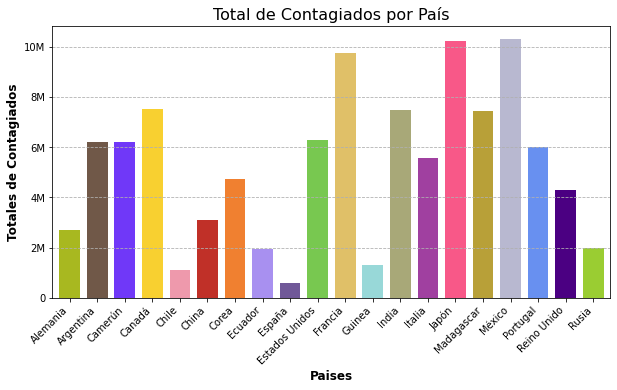

In [302]:
colors = ['#A8B820',  '#705848',  '#7038F8',  '#F8D030',  '#EE99AC', 
          '#C03028',   '#F08030', '#A890F0',  '#705898',  '#78C850',  
          '#E0C068',  '#98D8D8',  '#A8A878',  '#A040A0',  '#F85888',  
          '#B8A038',  '#B8B8D0',  '#6890F0', 'indigo','yellowgreen']

df_paises = pd.concat([dataset1_sort, 
                       pd.DataFrame(colors,
                                    index = dataset1_sort.index,
                                    columns = ["Colors"])],
                      axis = 1)

####### Función de Abreviación #############

def abreviacion(x, pos):
    if x >= 1e6:
        s = '{:1.0f}M'.format(x*1e-6)
    else:
        s = '{:1.0f}'.format(x*1e-3)
    return s

####### Gráfico #############

ax = df_paises.plot(kind = 'bar', 
                    y = 'Contagiados',
                    color = df_paises.Colors,
                    legend=False,
                    width = 0.75,
                    figsize =(10, 5))


##### Ajustes
ax.set_title('Total de Contagiados por País', size = 16)

ax.yaxis.set_major_formatter(abreviacion)
ax.set_xlabel("Paises",
             fontsize = 12, 
              weight= "semibold")

ax.set_ylabel("Totales de Contagiados",
              fontsize = 12, 
              weight= "semibold")

plt.xticks(rotation = 45, 
           ha = 'right')

ax.yaxis.grid(True, 
              which = 'major',
              linestyle = 'dashed')

plt.show()

Explorando los datos históricos de esta pandemia, fue posible recopilar la información de cantidad de contagiados internacionalmente durante los primeros 5 años y los resultados mostraron un crecimiento exponencial de los casos.

**Visualización 2 (V02)**

**Tarea identificada**: Presentar la tendencia anual de contagiados durante un periodo de 5 años = {***Present,Trends***}

**Justificación**: Utilice un gráfico de líneas para presentar la tendencia mundial durante un periodo de 5 años,
en el cual se puede inferir que la enfermedad está siguiendo una tendencia exponencial que va hacia el alza de casos en el globo y que en los últimos años en el rango 2015-2017 aumentaron más los casos que disminuyeron.

In [338]:
# V02: Visualización que permita ver la evolución del total de infectados en el tiempo (fecha).
# Dataset: V02.csv 
dataset_v02 = pd.read_csv('/Users/darwi/Downloads/MiniProyecto3/V02.csv', index_col = 'Año')

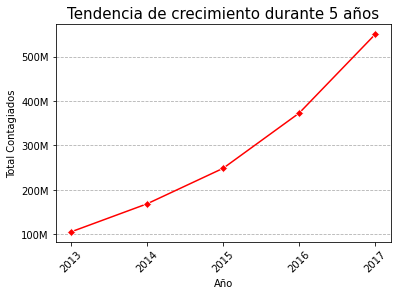

In [304]:
from matplotlib.ticker import FuncFormatter 
import matplotlib.ticker as ticker

def abreviacion(x, pos):
    if x >= 1e6:
        s = '{:1.0f}M'.format(x*1e-6)
    else:
        s = '{:1.0f}'.format(x*1e-3)
    return s


ax = sns.lineplot(data = dataset_v02, x="Año", y="Total Contagiados",
                 markers = True, 
                  dashes = True,
                  estimator  = None,
                  marker = 'D',
                 color = "r")

ax.set_title('Tendencia de crecimiento durante 5 años', size = 15)

ax.yaxis.set_major_formatter(FuncFormatter(abreviacion))
ax.xaxis.set_major_locator(ticker.MultipleLocator(1)) 
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
    
ax.yaxis.grid(True, 
              which = 'major',
              linestyle = 'dashed')

plt.show()

Ahora, comparando la situación por país, es posible notar cómo en algunos países, como Chile, la infección fue controlada mientras en otros no, como México. Esto se explica por la anticipada toma de decisiones en salud realizados en varios de estos países.


**Visualización 3 (V03)**

**Tarea identificada**: Comparar las tendencias de contagiados por País, durante un periodo de 5 años = {***Compare,Trends***}

**Justificación**: Utilice un small multiple para poder comparar en que países sus tendencias de contagiados aumentaron, disminuyeron o solamente se asolaparon durante el tiempo, lográndome ayudar a comparar en que países fue más controlada la pandemia debido a una óptima implementación de políticas públicas en el ámbito de la salud, comparando países como Ecuador que su tendencia se asolapo o México que su tendencia fua la alza.

In [319]:
# V03: Visualización que permita ver el total de infectados en el tiempo por país (fecha).
# Dataset: V03.csv 
dataset_v03 = pd.read_csv('/Users/darwi/Downloads/MiniProyecto3/V03.csv')
dataset3_sort = dataset_v03.sort_values(by ='Pais')
dataset3_pivot = pd.melt(dataset3_sort, id_vars =['Pais'],
                         value_vars = ['2013','2014','2015','2016','2017'],
                         var_name ='Año', 
                         value_name ='Total de Contagiados')

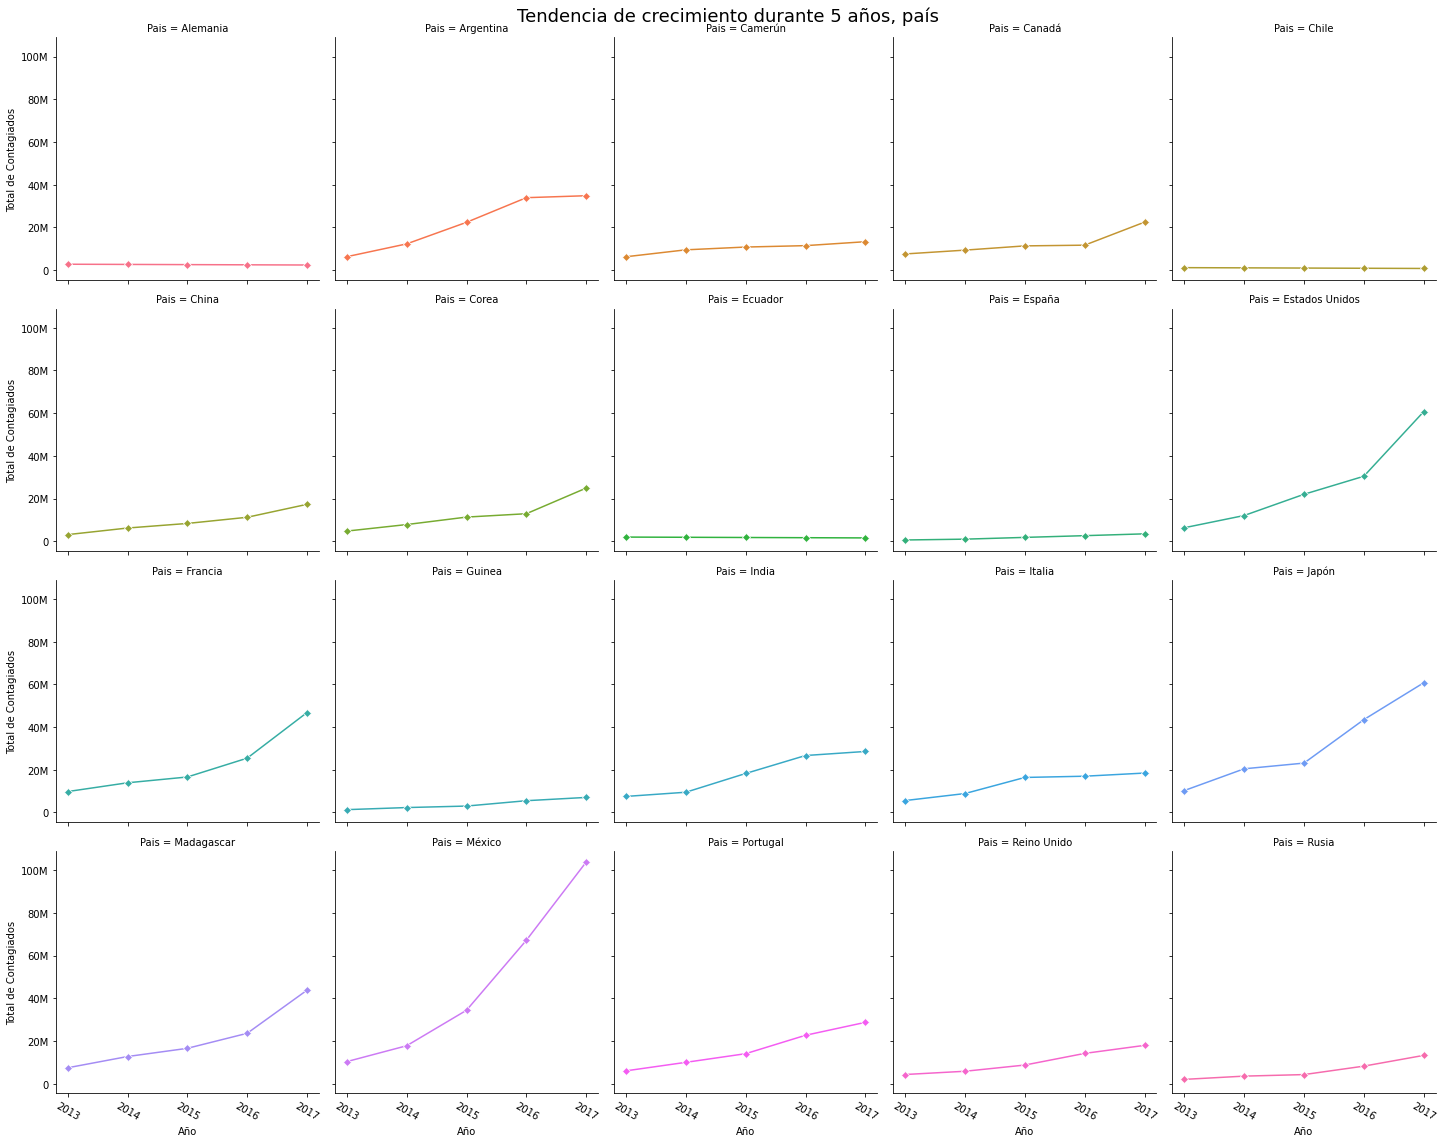

In [337]:
from matplotlib.ticker import FuncFormatter

def abreviacion(x, pos):
    if x >= 1e6:
        s = '{:1.0f}M'.format(x*1e-6)
    else:
        s = '{:1.0f}'.format(x*1e-3)
    return s

ax =  sns.FacetGrid(data = dataset3_pivot ,
                     col= "Pais",
                     hue= "Pais",
                     col_wrap=5,
                     height=4,
                    margin_titles=True
                  )

ax.fig.suptitle("Tendencia de crecimiento durante 5 años, país",
                  fontsize=18, fontdict={"weight": "bold"})

ax.map(sns.lineplot,
       "Año", 
       "Total de Contagiados",
       marker = 'D')


for ax in ax.axes.flat:
    ax.yaxis.set_major_formatter(FuncFormatter(abreviacion))
    for label in ax.get_xticklabels():
        label.set_rotation(330)
    
# Visualizar el gráfico
plt.show()

Las visualizaciones anteriores colocan la evolución del contagios según las fechas de ocurrencia, pero la realidad es que cada país tuvo su primer infectado en distintos momentos. Al encontrarse en distintas escalas de tiempo, surge la interrogante de cómo distribuyen los crecimientos de contagios bajo una misma escala de tiempo, que corresponde al tiempo que lleva el país con infecciones presentes. Por ejemplo, se encontró que a los dos meses de infección, el mínimo de contagios presentes en un país fue de 783 casos, el máximo de 8055 casos, y la mediana a nivel mundial fue de 2876 casos aproximadamente. 


**Visualización 4 (V04)**

**Tarea identificada**: Identificar los minimos, medios y maximos mensuales de contagiados totales mundiales = {***Identify,Outliers***}

**Justificación**: Diseñe este box-plot para poder identificar los Outliers de la distribución mensual de contagiados del total de países que se presentan en los meses que afecto la pandemia ese año en particular, señalando que el mes de abril fue el que menos casos reporto y el mes de mayo que lo sigue fue el mes con mayores casos en el ámbito mundial.

In [339]:
# V04: Visualización que permite ver la distribución de número de contagios de países en función al tiempo de infección.
# Dataset: V04.csv 
dataset_v04 = pd.read_csv('/Users/darwi/Downloads/MiniProyecto3/V04.csv')

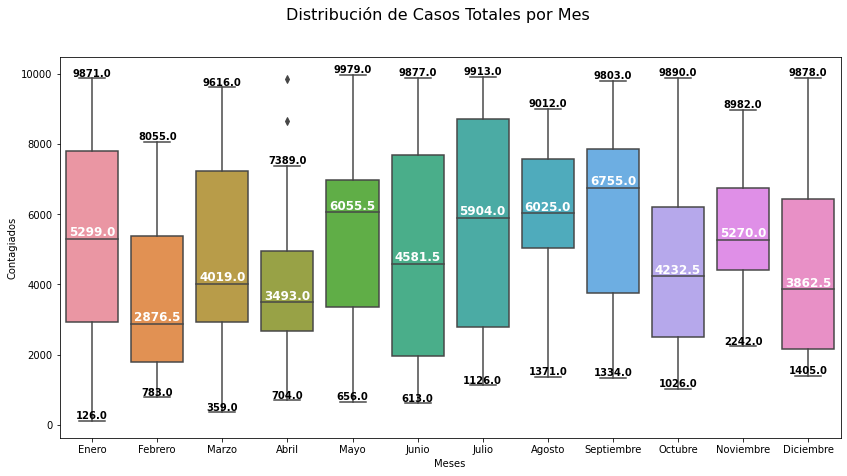

In [340]:
def Nombre_Mes(Mes):
    meses={1:'Enero', 2:'Febrero', 3:'Marzo', 4:'Abril', 5:'Mayo', 6:'Junio',
        7:'Julio', 8:'Agosto', 9:'Septiembre', 10:'Octubre', 11:'Noviembre', 12:'Diciembre'}
    return meses.get(Mes)

dataset_v04['Meses'] = dataset_v04['Mes'].apply(Nombre_Mes)
data4_anex = dataset_v04

fig, ax = plt.subplots(1, 1, figsize=(14,7))

fig.suptitle('Distribución de Casos Totales por Mes', size = 16)

ax = sns.boxplot(x = "Meses", y = 'Contagiados', data = data4_anex)

#Texto en mediana
lines = ax.get_lines()
categories = ax.get_xticks()
for cat in categories:
    y = round(lines[4+cat*6].get_ydata()[0],1)
    ax.text(
        cat, 
        y, 
        f'{y}', 
        ha='center', 
        va='bottom', 
        fontweight='bold', 
        size=12,
        color='white')
    
#Texto en maximo
lines = ax.get_lines()
categories = ax.get_xticks()
for cat in categories:
    y = round(lines[3+cat*6].get_ydata()[0],1)
    ax.text(
        cat, 
        y, 
        f'{y}', 
        ha='center', 
        va='bottom', 
        fontweight='bold', 
        size=10,
        color='black')
    
#Texto en minimo
lines = ax.get_lines()
categories = ax.get_xticks()
for cat in categories:
    y = round(lines[2+cat*6].get_ydata()[0],1)
    ax.text(
        cat, 
        y, 
        f'{y}', 
        ha='center', 
        va='bottom', 
        fontweight='bold', 
        size=10,
        color='black')

plt.show()

Otra interrogante que surgió fue ¿este virus fue más letal en épocas y lugares de bajas temperaturas, de altas temperaturas o la temperatura no tuvo efecto? En base a los datos reunidos de facellimientos registrados por mes en los 5 primeros años, fue posible observar lo siguiente para cada hemisferio:


**Visualización 5 (V05)**

**Tarea identificada**: Resumir la tendencia de contagiados en meses y años segun hemisferios globales = {***Summarize,Trends***}

**Justificación**: Resumí los datos del mes y año en el estimador estadístico media para poder agregarlos en el heat-map en para poder visualizar que meses fueron más afectos a la pandemia según mes en particular y estación ambiental.
Resumiendo, que los meses que afecta el invierno tanto como el hemisferio sur como el hemisferio norte son los meses que más tiene contagiados.

In [341]:
# V05: Dos visualizaciones (uno por hemisferio) que permita visualizar la cantidad de fallecimientos por mes y año. 
# De modo que permita determinar si hubo algunos meses en particular donde aumentó la cantidad de fallecidos o
# siempre se mantuvo de forma homogénea
# Datasets: V05-hem-norte.csv y V05-hem-sur.csv
dataset_V05_norte = pd.read_csv('/Users/darwi/Downloads/MiniProyecto3/V05-hem-norte.csv')
dataset_V05_sur = pd.read_csv('/Users/darwi/Downloads/MiniProyecto3/V05-hem-sur.csv')

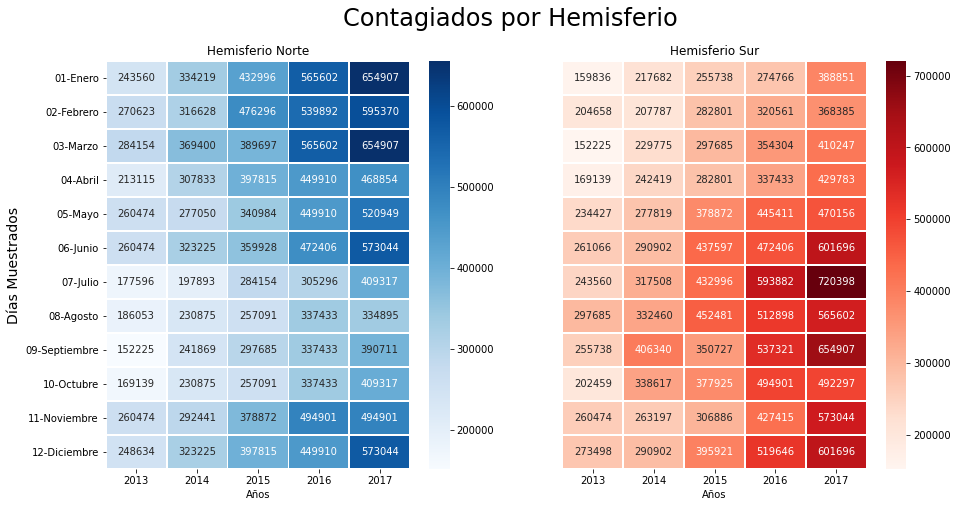

In [342]:
df_5north = dataset_V05_norte.groupby(['Año','Mes'],sort=False).agg(['mean'])
df_5north.columns = df_5north.columns.droplevel(0)
df_5north.reset_index(inplace = True)


df_5south = dataset_V05_sur.groupby(['Año','Mes'],sort=False).agg(['mean'])
df_5south.columns = df_5south.columns.droplevel(0)
df_5south.reset_index(inplace = True)


df_pivot = pd.pivot_table(df_5north[['Mes','Año','mean']],
                          values = 'mean', 
                          index = ['Mes'], 
                          columns = 'Año')

df_pivot2 = pd.pivot_table(df_5south[['Mes','Año','mean']],
                          values = 'mean', 
                          index = ['Mes'], 
                          columns = 'Año')
##### Asignación de Pivot

heatmap_north = df_pivot
heatmap_south = df_pivot2 


fig1, (ax0, ax1) = plt.subplots(1, 2, figsize=(15,7.5))

#Gráficos Dual.
fig1.suptitle('Contagiados por Hemisferio', size = 24)

sns.heatmap(heatmap_north,
            cmap = "Blues",
            annot = True,
            linewidths = .8,
            ax = ax0,
            xticklabels = True,
            yticklabels = True,
            fmt = "d")
ax0.set_xlabel('Años')
ax0.set_ylabel('Días Muestrados', size = 14)
ax0.set_title('Hemisferio Norte')
        
sns.heatmap(heatmap_south,
            cmap = "Reds",
            annot = True,
            linewidths = .8,
            ax = ax1,
            xticklabels = True,
            yticklabels = False,
            fmt = "d")
ax1.set_xlabel('Años')
ax1.set_ylabel('')
ax1.set_title('Hemisferio Sur')

plt.show()

Por otro lado, esta pandemia que se caracterizó por una división etárea muy marcada entre sus contagiados. El 60% de los contagiados eran personas sobre 50 años, 30% eran menores a los 18 años y solo el 10% restante oscila entre 19 y 49 años. Por otro lado, el 80% presentaba como síntomas base: fiebre, tos y malestar estomacal; mientras que el 20% restante presentó síntomas extendidos a los anteriores, agregando dificultad para respirar. 

**Visualización 6 (V06)**

**Tarea identificada**:Presentar las proporciones de contagiados según síntomas y edades = {***Present,Features***} 

**Justificación**: Utilice gráficos de torta para poder presentar las proporciones de los contagiados según la edad y los síntomas posibles de la propia enfermedad tanto para base como extendido, ya que es un gráfico útil para poder presentar features o características de un conjunto de pocos elementos.

In [49]:
# V06: Dos visualizaciones que permitan mostrar la proporción de infectados por edad y la proporción de síntomas posibles.
# Dataset: V06.csv 
dataset_V06 = pd.read_csv('/Users/darwi/Downloads/MiniProyecto3/V06.csv')

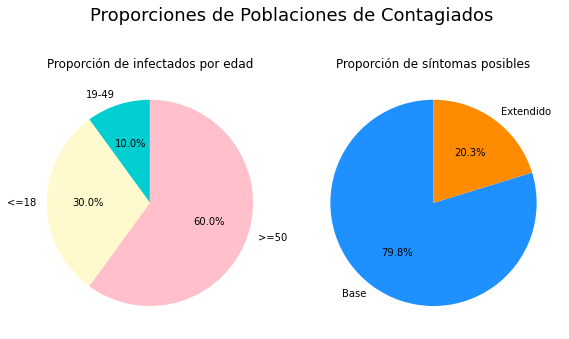

In [345]:
# Agrupación de la variable class
class_sintomas = dataset_V06.groupby("Sintomas").size()
class_xxx = class_sintomas / class_sintomas.sum()

class_edades = dataset_V06.groupby("Edad").size()
class_yyy = class_edades / class_edades.sum()

###############

fig1, (ax0, ax1) = plt.subplots(1, 2, figsize=(8,8))

fig1.suptitle('Proporciones de Poblaciones de Contagiados', size = 18)

plt.subplots_adjust(right=0.97,\
                    left=0.03,\
                    bottom=0.03,\
                    top=1.25,\
                    wspace=0.1,\
                    hspace=0.1)

ax0.pie(class_yyy, 
        autopct = '%1.1f%%',
        colors = ["darkturquoise", "lemonchiffon", "pink"],
        labels = ['19-49', '<=18', '>=50'],
        startangle = 90)
ax0.set_title('Proporción de infectados por edad', size = 12)

ax1.pie(class_xxx, 
        autopct = '%1.1f%%',
        colors= ['dodgerblue','darkorange'],
        labels = ['Base','Extendido'],
        startangle = 90)

ax1.set_title('Proporción de síntomas posibles', size = 12)

plt.show()

Además de esta segmentación etárea y de diagnóstico, la investigación inicial no tenía una caracterización más profunda. Fue tras cruzar y analizar la correlación de atributos de edad, peso y altura de contagiados; e identificando aquellos con síntomas base o síntomas extendidos, que se logró obtener una mejor descripción de perfiles.


**Visualización 7 (V07)**

**Tarea identificada**: Descubrir correlaciones dentro de los atributos muestreados = {***Discover,Correlation***}

**Justificación**: Utilice este tipo de gráfico de correlaciones para demostrar las relaciones dentro de pares de caracteristicas que fueron estudiadas en esta pandemia demoestranco que existe una correlación lineal entre caracteristicas.

In [343]:
# V07: Visualización que permita apreciar distribución y potencialmente correlación entre pares de atributos de 
# dataset: edad, peso y altura; con categorización por tipos de síntomas presentados.
# Dataset: V07.csv 
dataset_V07 = pd.read_csv('/Users/darwi/Downloads/MiniProyecto3/V07.csv')

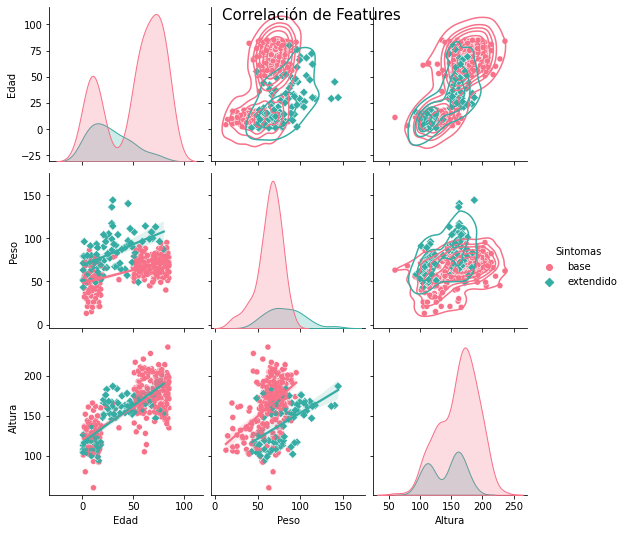

In [344]:
ax = sns.pairplot(dataset_V07, hue="Sintomas", palette="husl", markers=["o", "D"])
ax.fig.suptitle("Correlación de Features",
                  fontsize = 15)

ax.map_upper(sns.kdeplot, levels=7, color=".2")
ax.map_lower(sns.regplot, scatter_kws={'s':7})